In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
def build_medicore_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



In [3]:
def build_optimized_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



c:\Users\sajee\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7593 - loss: 0.6664 - val_accuracy: 0.8603 - val_loss: 0.3877
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8757 - loss: 0.3367 - val_accuracy: 0.8915 - val_loss: 0.3015
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8973 - loss: 0.2770 - val_accuracy: 0.9008 - val_loss: 0.2735
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9104 - loss: 0.2415 - val_accuracy: 0.9045 - val_loss: 0.2693
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9202 - loss: 0.2123 - val_accuracy: 0.9016 - val_loss: 0.2726
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.9304 - loss: 0.1898 - val_accuracy: 0.9066 - val_loss: 0.2621
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9379 - loss: 0.1696 - val_accuracy: 0.9025 - val_loss: 0.2784
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9434 - loss: 0.

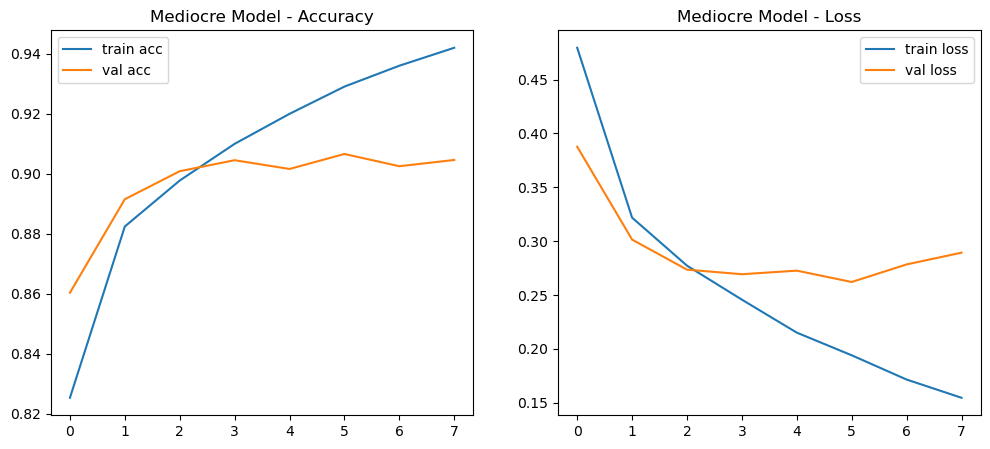

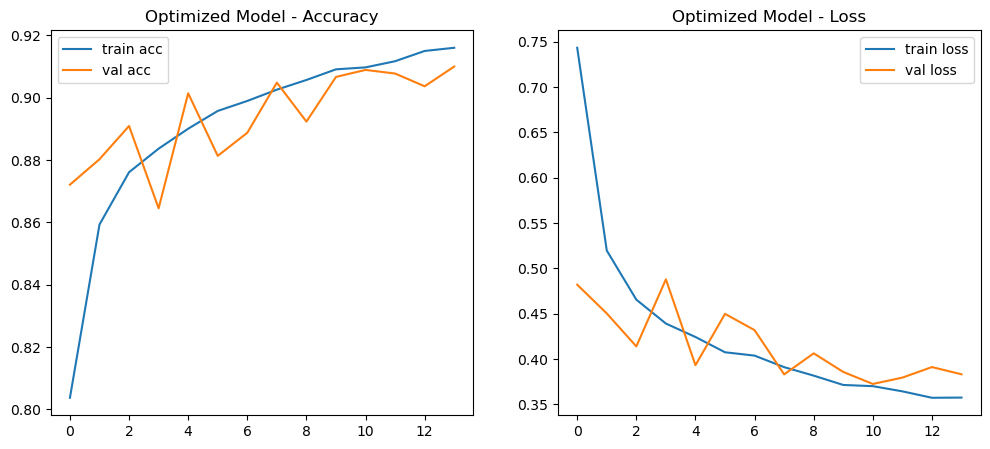

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


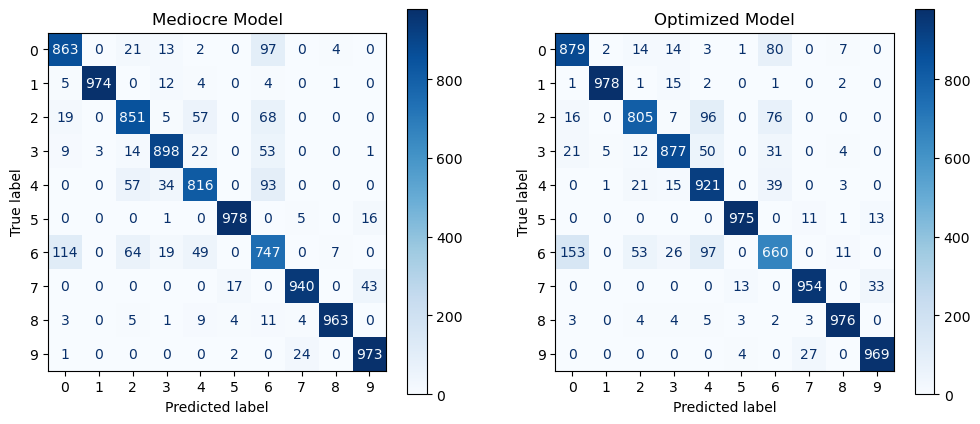

In [4]:
def train_test_evaluate_models():
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train, x_test = x_train[..., np.newaxis], x_test[..., np.newaxis]
    
    model1 = build_medicore_model()
    model2 = build_optimized_model()
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history1 = model1.fit(x_train, y_train, epochs=8, validation_split=0.2, callbacks=[early_stopping])
    history2 = model2.fit(x_train, y_train, epochs=16, validation_split=0.2, callbacks=[early_stopping])
    
    test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
    test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
    print(f"Mediocre Model Accuracy: {test_acc1}, Optimized Model Accuracy: {test_acc2}")

    test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
    test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
    print(f"Mediocre Model Accuracy: {test_acc1}, Optimized Model Accuracy: {test_acc2}")

    
    def plot_curves(history, title):
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='train acc')
        plt.plot(history.history['val_accuracy'], label='val acc')
        plt.title(f'{title} - Accuracy')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='train loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title(f'{title} - Loss')
        plt.legend()
        plt.show()
    
    plot_curves(history1, "Mediocre Model")
    plot_curves(history2, "Optimized Model")
    
    y_pred1 = np.argmax(model1.predict(x_test), axis=1)
    y_pred2 = np.argmax(model2.predict(x_test), axis=1)
    
    cm1 = confusion_matrix(y_test, y_pred1)
    cm2 = confusion_matrix(y_test, y_pred2)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ConfusionMatrixDisplay(cm1).plot(ax=ax[0], cmap='Blues')
    ax[0].set_title('Mediocre Model')
    ConfusionMatrixDisplay(cm2).plot(ax=ax[1], cmap='Blues')
    ax[1].set_title('Optimized Model')
    plt.show()

train_test_evaluate_models()
    
